In [17]:
from keras.models import  Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from keras.datasets import mnist


In [23]:
from keras.layers.pooling import MaxPooling2D
model = Sequential()
#create the Encoder Network
model.add(Conv2D(35, kernel_size=3, activation='relu', padding = 'same',input_shape=(28,28,1)))
model.add(MaxPooling2D(2, padding = 'same'))
model.add(Conv2D(25,3,activation='relu', padding = 'same'))
model.add(MaxPooling2D(2,padding = 'same'))

#create the Decoder Network
model.add(Conv2D(25, kernel_size=3, activation='relu', padding = 'same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding = 'same')) #output layer



In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 35)        350       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 35)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 25)        7900      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 25)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 25)          5650      
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 25)      

In [24]:
model.compile(optimizer='adam', loss = 'binary_crossentropy')

In [25]:
import numpy as np
#load the data and train the model
(X_train,_), (X_test, _)= mnist.load_data()
X_train= X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_train = np.reshape(X_train, (len(X_train), 28,28,1))
X_valid = X_train[:5000]
X_train = X_train[5000:]
X_test = np.reshape(X_test, (len(X_test), 28,28,1))

In [26]:
noise_factor = 0.7
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 
X_valid_noisy = X_valid + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_valid.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
X_valid_noisy = np.clip(X_valid_noisy, 0., 1.)

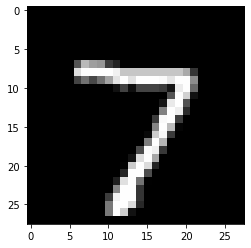

In [27]:
plt.imshow(X_test[0].reshape(28,28))

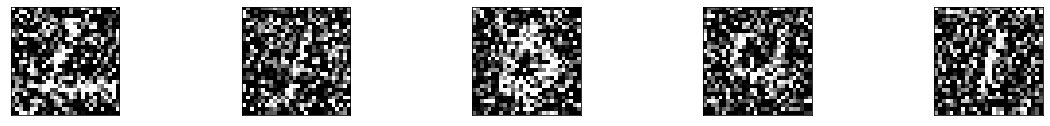

In [28]:
#Here is how the noisy images look right now.
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [29]:
model.fit(X_train_noisy, X_train, epochs = 5,batch_size = 128, validation_data = (X_valid_noisy, X_valid))

Epoch 1/5
430/430 [==============================] - 158s 366ms/step - loss: 0.1966 - val_loss: 0.1495
Epoch 2/5
430/430 [==============================] - 157s 364ms/step - loss: 0.1444 - val_loss: 0.1398
Epoch 3/5
430/430 [==============================] - 157s 366ms/step - loss: 0.1379 - val_loss: 0.1351
Epoch 4/5
430/430 [==============================] - 181s 422ms/step - loss: 0.1342 - val_loss: 0.1323
Epoch 5/5
430/430 [==============================] - 165s 385ms/step - loss: 0.1317 - val_loss: 0.1299


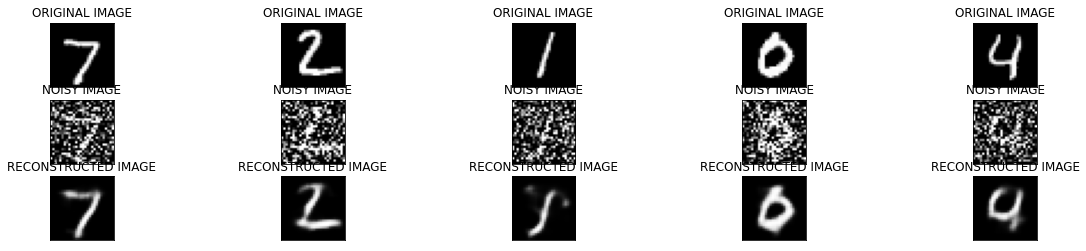

In [31]:
import matplotlib.pyplot as plt
pred = model.predict(X_test_noisy)
plt.figure(figsize = (20,4))
for i in range(5) :
  #display the original image
  ax = plt.subplot(3,5,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title("ORIGINAL IMAGE")
  #display the noisy image
  ax = plt.subplot(3,5,i+5+1)
  plt.imshow(X_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title("NOISY IMAGE")

  #display reconstructed image
  ax = plt.subplot(3,5, i+10+1)
  plt.imshow(pred[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title("RECONSTRUCTED IMAGE")
plt.show()

